# Compare the effectiveness of different Bayesian classifiers on high dimensional data and analyze the reasons.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = scipy.io.loadmat('./MNIST.mat')
X = data['X'].T
X1 = data['X']
y = data['I'][0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

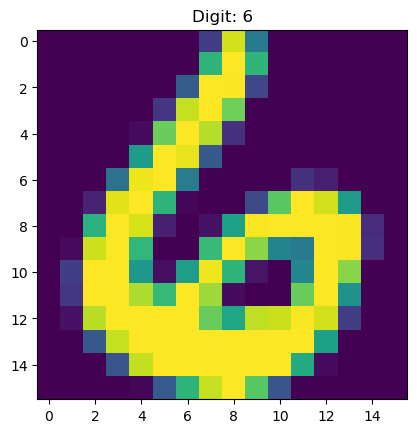

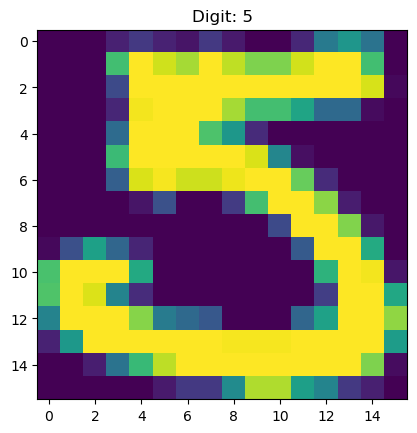

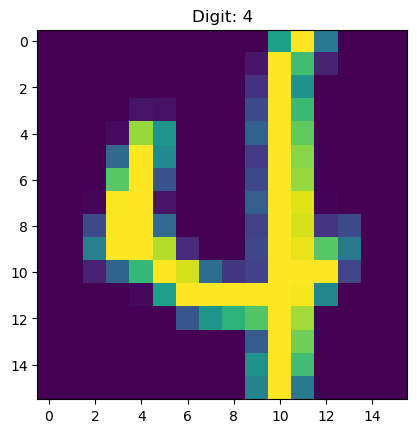

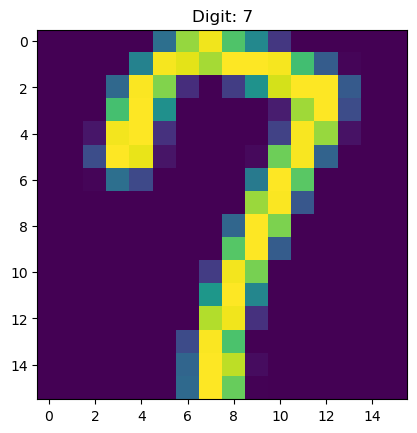

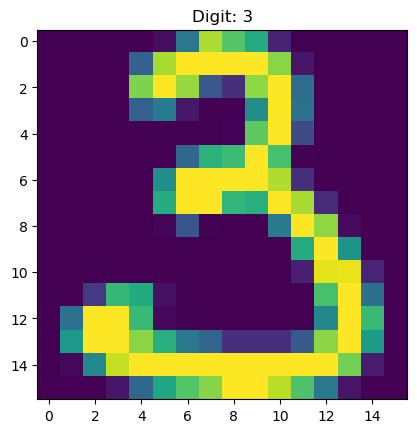

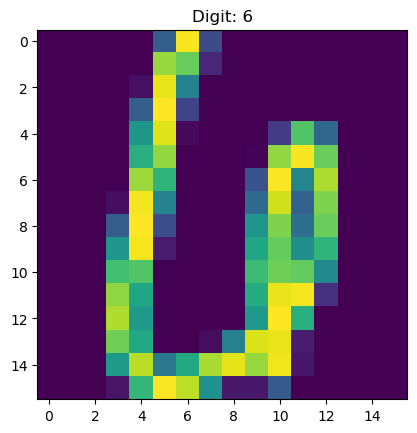

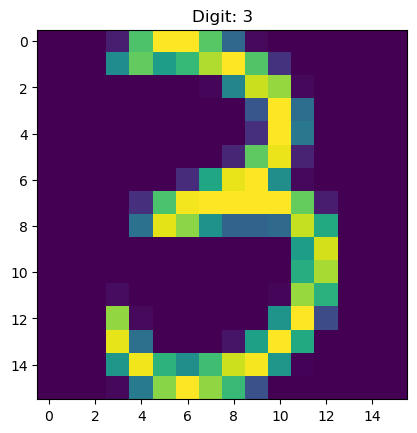

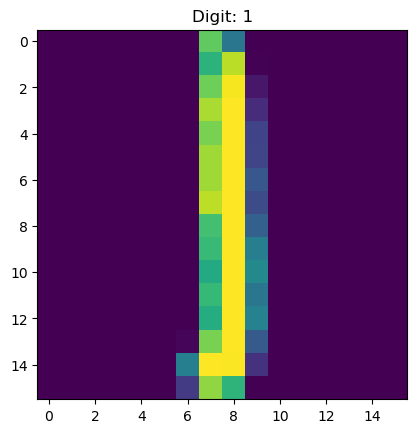

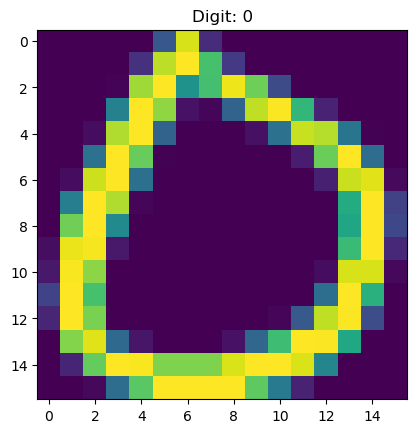

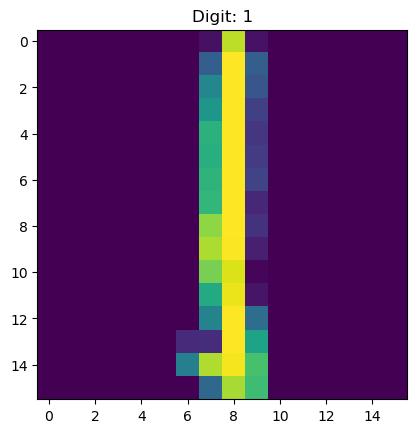

In [3]:
# show the picture in the MINIST data
for i in range(10):
    plt.imshow(X1[:,i].reshape(16,16))
    plt.title(f"Digit: {y[i]}")
    plt.show()

In [4]:
# Normalization of data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [6]:
def evaluate_model(name, y_test, y_pred):
    model_list.append(name)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)


## Multinomial Naive Bayes¶

In [7]:
# Create a Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = mnb_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Multinomial Naive Bayes', y_test, y_pred)

Accuracy: 0.8888888888888888
Precision: 0.9056021999443052
Recall: 0.8888888888888888
F1 Score: 0.8913170780460709
Confusion Matrix:
 [[63  0  0  0  0  0  0  0  4  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 2  0 29  1  0  0  1  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  1  9]
 [ 0  0  0  1  0 11  0  0  0  0]
 [ 2  1  0  0  1  0 28  0  1  0]
 [ 0  1  0  0  0  0  0 23  1  6]
 [ 0  0  0  1  0  0  1  0 29  1]
 [ 0  0  0  0  2  0  0  1  0 20]]


## Gaussian Naive Bayes

In [8]:
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = gnb_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Gaussian Naive Bayes', y_test, y_pred)

Accuracy: 0.7602339181286549
Precision: 0.8023643698478913
Recall: 0.7602339181286549
F1 Score: 0.7569280678974528
Confusion Matrix:
 [[56  0  0  0  0  0  0  0 11  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  3  0  1  0  7  0]
 [ 0  0  0  6  0  0  0  0 12  0]
 [ 0  0  1  0 11  3  0  1  0 16]
 [ 0  0  1  1  0  1  2  0  6  1]
 [ 0  1  1  0  1  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 27  1  3]
 [ 0  0  1  0  0  0  1  2 27  1]
 [ 0  0  0  0  2  0  0  1  1 19]]


## Complement Naive Bayes

In [9]:
cpl_model = ComplementNB()

# Train the model
cpl_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = cpl_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Complement Naive Bayes', y_test, y_pred)

Accuracy: 0.6812865497076024
Precision: 0.7515939538108553
Recall: 0.6812865497076024
F1 Score: 0.6451155479208134
Confusion Matrix:
 [[63  0  0  0  0  0  4  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 4  2 26  0  0  0  0  1  0  0]
 [ 3  0  1 14  0  0  0  0  0  0]
 [10  4  0  0  4  0  0  9  0  5]
 [ 3  1  1  1  0  3  1  2  0  0]
 [14  4  2  0  0  0 13  0  0  0]
 [ 0  6  0  0  0  0  0 25  0  0]
 [ 2 10  1  0  0  0  0  4 15  0]
 [ 2  5  0  0  0  0  0  7  0  9]]


## Bernoulli Naive Bayes

In [10]:
ber_model = BernoulliNB()

# Train the model
ber_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = ber_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Bernoulli Naive Bayes', y_test, y_pred)

Accuracy: 0.8918128654970761
Precision: 0.8959734210266851
Recall: 0.8918128654970761
F1 Score: 0.8918633481187769
Confusion Matrix:
 [[59  0  0  0  0  0  7  0  1  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 1  0 29  1  0  1  0  0  1  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  1  0  0 27  0  0  0  0  4]
 [ 0  0  0  1  0 11  0  0  0  0]
 [ 3  2  0  0  1  0 27  0  0  0]
 [ 0  3  1  0  0  0  0 25  0  2]
 [ 0  1  0  1  0  0  0  0 29  1]
 [ 0  0  0  0  3  0  0  1  0 19]]


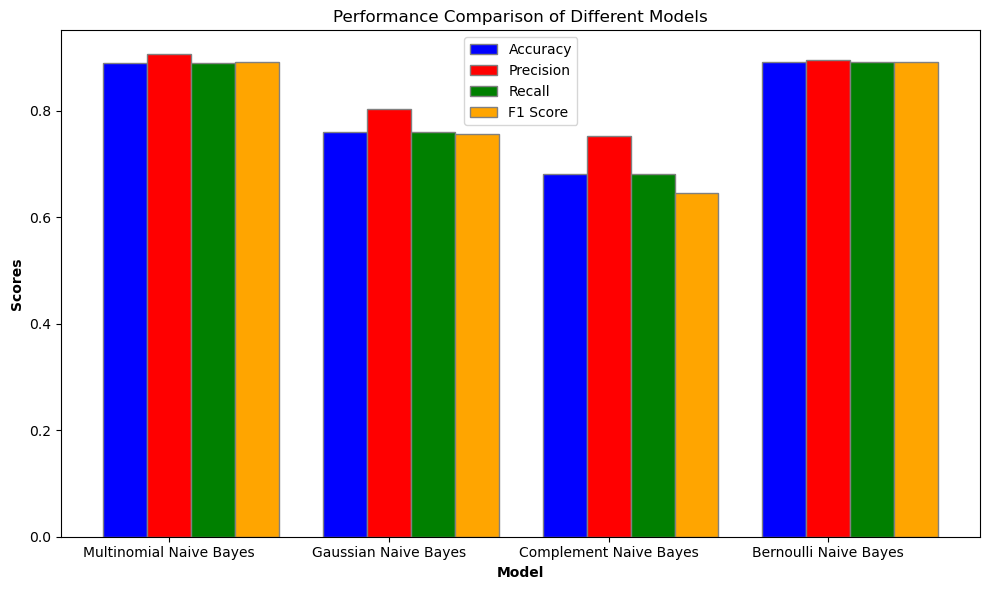

In [11]:
# Number of models
n_models = len(model_list)

# Creating bar positions
barWidth = 0.2
r1 = np.arange(n_models)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_list, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_list, color='red', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_list, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_list, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(n_models)], model_list)

# Creating legend & title
plt.title('Performance Comparison of Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Why is Bernoulli Naive Bayes the most accurate?

## 1.The effectiveness of the Gaussian Naive Bayes classifier for your dataset arises from a good match between the distribution of your features and the Gaussian (normal) distribution assumed by the model.

## 2.The Complement Naive Bayes classifier may underperform on balanced datasets or when features don't follow the expected distribution, as it's specifically designed for imbalanced data and text classification. If your dataset doesn't fit these criteria, CNB may not provide any advantage over other classifiers.

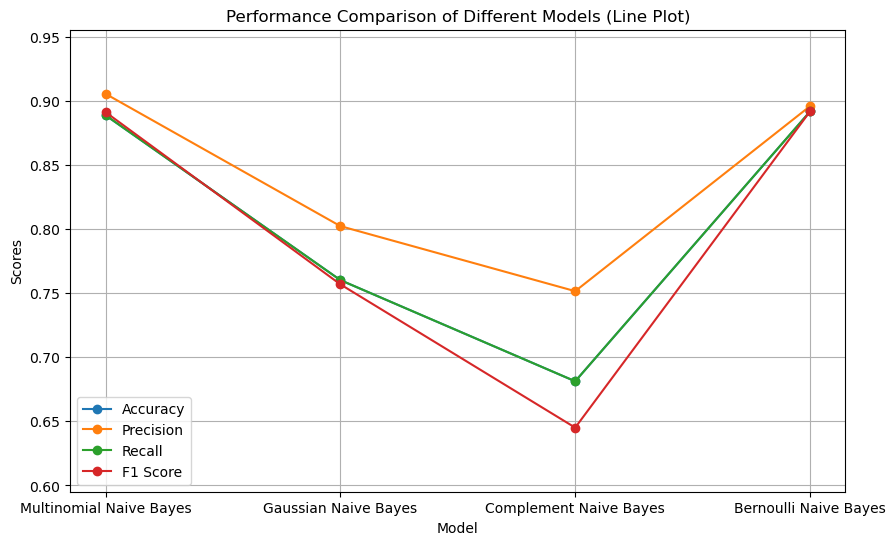

In [12]:
# Finding the min and max values among all scores to set y-axis limits
min_score = min(min(accuracy_list), min(precision_list), min(recall_list), min(f1_list))
max_score = max(max(accuracy_list), max(precision_list), max(recall_list), max(f1_list))

# Adding a small buffer to min and max values for better visualization
buffer = 0.05
y_min = max(0, min_score - buffer)  # Ensuring y_min is not less than 0
y_max = min(1, max_score + buffer)  # Ensuring y_max does not exceed 1

# Creating the line plot with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(model_list, accuracy_list, label='Accuracy', marker='o')
plt.plot(model_list, precision_list, label='Precision', marker='o')
plt.plot(model_list, recall_list, label='Recall', marker='o')
plt.plot(model_list, f1_list, label='F1 Score', marker='o')

plt.title('Performance Comparison of Different Models (Line Plot)')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()


## As we can see by looking at the data, there is a great deal of similarity in the distribution of each of the labels, leading to the calculation of Accuracy and Recall to get equal values

In [13]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from sklearn.model_selection import train_test_split
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

In [14]:
# Load your CSV file
data = pd.read_csv('./StressLevelDataset.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
hc = HillClimbSearch(train_data)
bic = BicScore(train_data)

# Learn the structure of the Bayesian network
best_model = hc.estimate(scoring_method=bic)

# Print the learned structure
print("Learned Structure:", best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('mental_health_history', 'sleep_quality'), ('mental_health_history', 'stress_level'), ('mental_health_history', 'future_career_concerns'), ('blood_pressure', 'future_career_concerns'), ('blood_pressure', 'bullying'), ('blood_pressure', 'stress_level'), ('blood_pressure', 'sleep_quality'), ('blood_pressure', 'headache'), ('blood_pressure', 'teacher_student_relationship'), ('blood_pressure', 'anxiety_level'), ('blood_pressure', 'safety'), ('blood_pressure', 'extracurricular_activities'), ('blood_pressure', 'academic_performance'), ('blood_pressure', 'basic_needs'), ('blood_pressure', 'depression'), ('blood_pressure', 'peer_pressure'), ('blood_pressure', 'self_esteem'), ('blood_pressure', 'noise_level'), ('blood_pressure', 'breathing_problem'), ('blood_pressure', 'study_load'), ('blood_pressure', 'living_conditions'), ('social_support', 'blood_pressure'), ('bullying', 'mental_health_history')]


In [16]:
# Learn the parameters of the Bayesian network
best_model = BayesianNetwork(best_model.edges())
best_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [17]:
# Create an inference object
inference = VariableElimination(best_model)

# Perform inference or predictions
# For example, to predict 'stress_level', you can query the model like this:
result = inference.query(variables=['stress_level'], evidence={'anxiety_level': 10, 'self_esteem': 15})
print(result)

+-----------------+---------------------+
| stress_level    |   phi(stress_level) |
+=================+=====================+
| stress_level(0) |              0.0020 |
+-----------------+---------------------+
| stress_level(1) |              0.9882 |
+-----------------+---------------------+
| stress_level(2) |              0.0098 |
+-----------------+---------------------+


In [18]:
def predict_stress_level(instance, model):
    evidence = instance.to_dict()
    evidence.pop('stress_level', None)  # Remove the target variable from evidence

    # Perform the query
    prediction = model.query(variables=['stress_level'], evidence=evidence)

    # Get the index of the maximum value (most probable state)
    predicted_state_index = np.argmax(prediction.values)

    # Map the index to the corresponding state
    predicted_state = prediction.state_names['stress_level'][predicted_state_index]
    
    return predicted_state

# Apply the modified function to the test dataset
test_data['predicted_stress_level'] = test_data.apply(lambda row: predict_stress_level(row, inference), axis=1)

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_data['stress_level'], test_data['predicted_stress_level'])
report = classification_report(test_data['stress_level'], test_data['predicted_stress_level'])

print(f"Accuracy: {accuracy}")

Accuracy: 0.8863636363636364


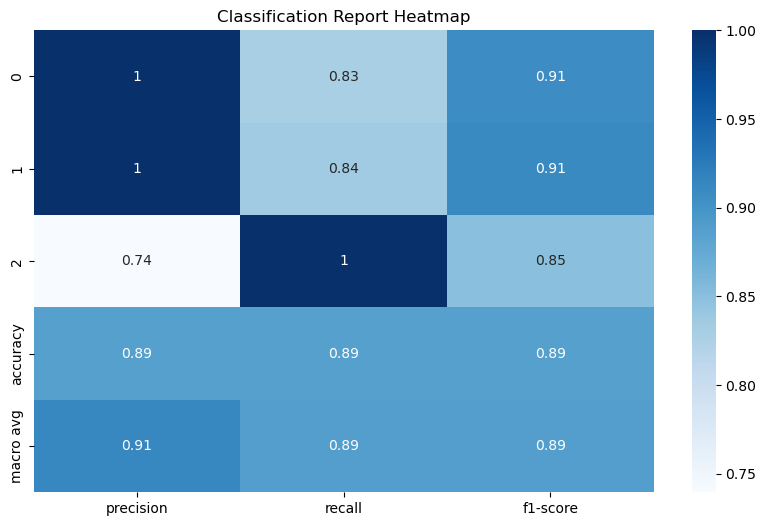

In [19]:
report_dict = classification_report(test_data['stress_level'], test_data['predicted_stress_level'], output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()
